# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


From above dataset, we can observe there are mixed datatypes in the given dataset

Upon preliminary analysis of Dataset, we can assume that the datatypes are mixed data set; i.e. continous type and categorical type is available

In [3]:
df.shape

(7043, 21)

There are 7043 Rows and 21 Columns including the Target in this Dataset

# Checking for any Null Values in the dataset

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no Null Values/ Missing Values in the given dataset

# Analyzing the Dataset Basic Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dtypes[df.dtypes == 'object']

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [7]:
df.dtypes[df.dtypes != 'object']

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
dtype: object

Most of the Columns Datatype are Object, Below are the observation we can come to conclusion from above information.

Categorical Data Columns (Object Type):

Out of 21 Columns, 18 Columns has Categorical Data

1.customerID

2.gender

3.Partner

4.Dependents

5.PhoneService

6.MultipleLines

7.InternetService

8.OnlineSecurity

9.OnlineBackup

10.DeviceProtection

11.TechSupport

12.StreamingTV

13.StreamingMovies

14.Contract

15.PaperlessBilling

16.PaymentMethod

17.TotalCharges

18.Churn

Continous Data Columns (Int and Float Type):

Out of 21 Columns, 3 Columns has Continous Data

1.SeniorCitizen

2.tenure

3.MonthlyCharges

Target Variable is Churn

Since the target variable 'Churn' data type is categorical, Need to approach this data set as Classification Problem

Upon analyzing the dataset, found TotalCharges column data has continous data However it is listed under Categorical Data. This is due to invalid data in the column So, need to check for invalid data like '?', ' ', '-'

# Analyzing the Invalid Data in the dataset

In [8]:
(df=='?').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can conclude that there are no '?' data in the dataset columns

In [9]:
(df==' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can conclude that there are 11 empty space ' ' data in TotalCharges column which will to be corrected in coming steps after analysis the column data individually

In [10]:
(df=='-').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can conclude that there are no '-' data in the dataset columns

# Resolving the Invalid data in TotalCharges column

In [11]:
df.replace({' ': np.nan}, inplace=True)

Replacing the Empty space data into null values

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Using KNN Imputer to resolve null values

In [13]:
ki = KNNImputer(n_neighbors=2)
df[['TotalCharges']] = ki.fit_transform(df[['TotalCharges']])
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Analyzing the Basic Statistics of the Dataset

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We can observe following things from above statistics,

Skewness presence is possible when the difference between 75% and max is considerably high.

Also, Skewness might be present when std is higher than mean.

SeniorCitizen and TotalCharges columns might possibly have outliers and skewness

# Checking for any Unique Set of Values/ Elements in all Columns

In [15]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Below are the observations we can make out from above unique value column data list,

customerID has 7043 unique values which is 100% so it would be efficient to drop these columns for better model performance.

gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, treamingMovies, Contract, PaymentMethod columns has reasonable unique data type value in the entire data set; So, need to analyse these columns more with respect to relationship with fraud_reported.

In [16]:
df=df.drop(columns = ['customerID'], axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Dropping the customerID column as explained in above observatory notes

# Analyzing Distribution of both Target and Feature Columns

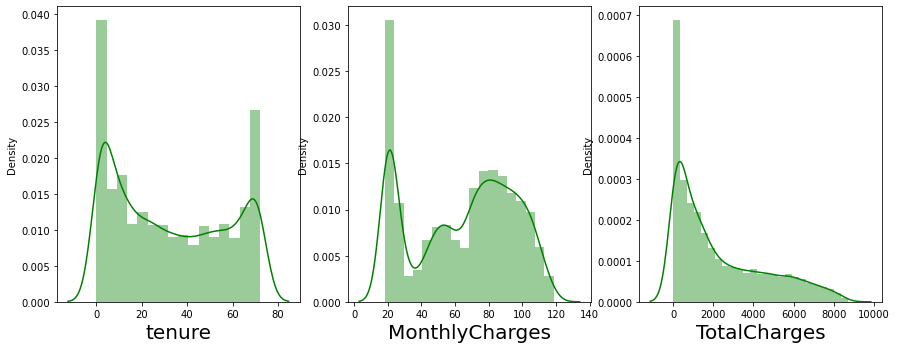

In [17]:
plt.figure(figsize = (20,25), facecolor='white')
plot_number = 1
for i in df[['tenure', 'MonthlyCharges', 'TotalCharges']]:
    if plot_number <=35:
        plt.subplot(4,4,plot_number)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

Upon analyzing above graphs, we can observe that TotalCharges has skewed data distribution.

In [18]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

As predicted Totalcharges Column data has skewness, i.e out of -0.50 to +0.50 Range

In [19]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

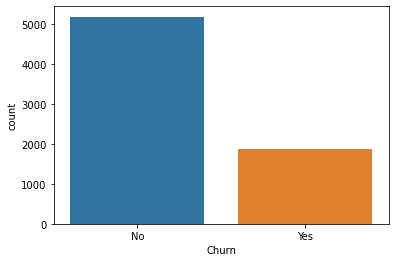

In [20]:
sns.countplot(df['Churn'])

Target Variable 'Churn' has 2 unique values

1.No

2.Yes

Majority of the Churn data is No.

We can also observe that there is a class imbalance which needs to be corrected at later stages

In [21]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

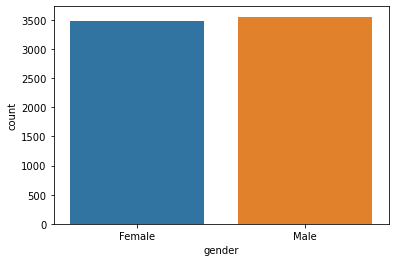

In [22]:
sns.countplot(df['gender'])

Majority of the customer are Male. There is no much difference in gender count as well

In [23]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

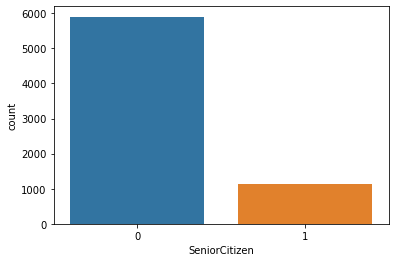

In [24]:
sns.countplot(df['SeniorCitizen'])

Majority of the customers not Senior Citizens.

In [25]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

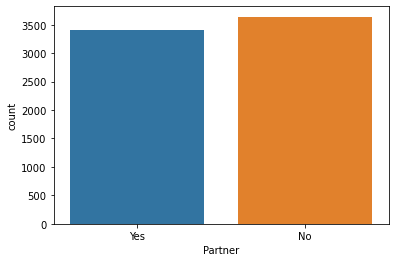

In [26]:
sns.countplot(df['Partner'])

Majority of the customers have partner and also there is not larger difference under this column data types

In [27]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

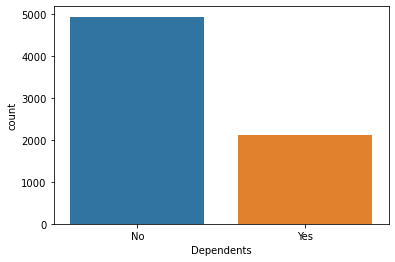

In [28]:
sns.countplot(df['Dependents'])

Majority of the customers doesnt have dependents

In [29]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

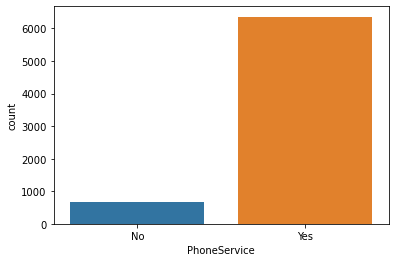

In [30]:
sns.countplot(df['PhoneService'])

Majority of the customers are with PhoneService

In [31]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

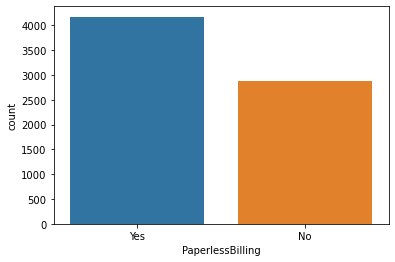

In [32]:
sns.countplot(df['PaperlessBilling'])

Majority of the customers has Paperless Billing

In [33]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

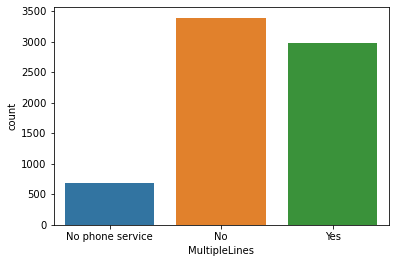

In [34]:
sns.countplot(df['MultipleLines'])

There are 3 categories under Multiple Lines columns

Majority of the customers has no Multiple Lines followed by having Multiple Lines and least are with no phone service

In [35]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

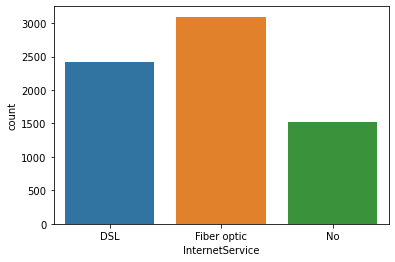

In [36]:
sns.countplot(df['InternetService'])

There are 3 categories under InternetService columns

Majority of the customers has Fiber optic Internet Service followed by DSL and least are with no Internet Service

In [37]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

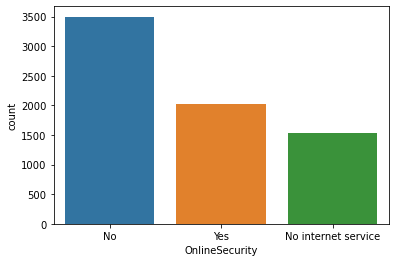

In [38]:
sns.countplot(df['OnlineSecurity'])

There are 3 categories under OnlineSecurity columns

Majority of the customers doesnt have Online Security followed by customers with online security and least are with no Internet Service

In [39]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

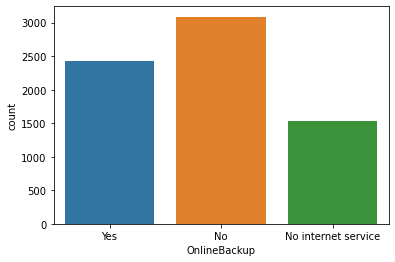

In [40]:
sns.countplot(df['OnlineBackup'])

There are 3 categories under OnlineBackup columns

Majority of the customers doesnt have/ use Online Backup service followed by customers with online Backup service and least are with no Internet Service

In [41]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

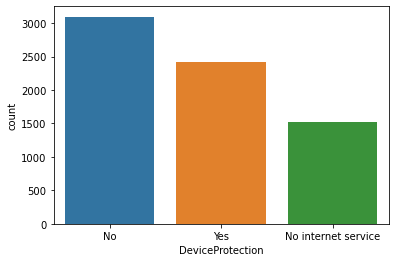

In [42]:
sns.countplot(df['DeviceProtection'])

There are 3 categories under DeviceProtection columns

Majority of the customers doesnt have/ use Device Protection service followed by customers with Device Protection service and least are with no Internet Service

In [43]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

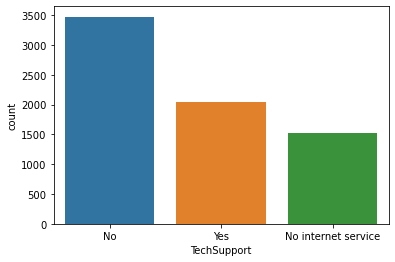

In [44]:
sns.countplot(df['TechSupport'])

There are 3 categories under TechSupport columns

Majority of the customers doesnt have/ use Technical Support service followed by customers using Tech Support service and least are with no Internet Service

In [45]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

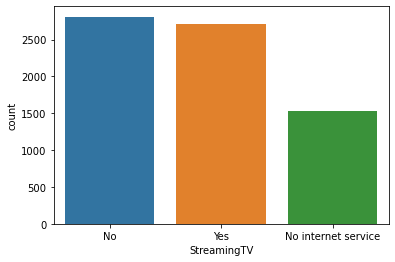

In [46]:
sns.countplot(df['StreamingTV'])

There are 3 categories under StreamingTV columns

Majority of the customers doesnt have/ use Streaming TV service followed by customers using Streaming TV service and least are with no Internet Service

In [47]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

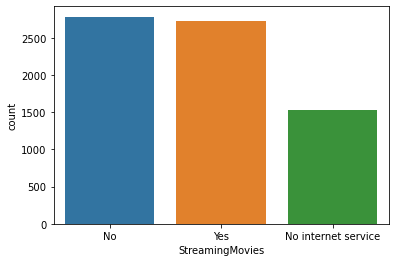

In [48]:
sns.countplot(df['StreamingMovies'])

There are 3 categories under StreamingMovies columns

Majority of the customers doesnt have/ use Streaming Movies service followed by customers using Streaming Movies service and least are with no Internet Service

In [49]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

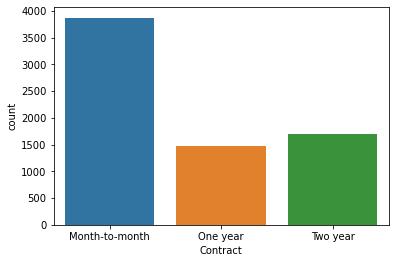

In [50]:
sns.countplot(df['Contract'])

There are 3 categories under Contract columns

Majority of the customers are under Month-to-month contract followed by two year contract and least are under one year contract

In [51]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

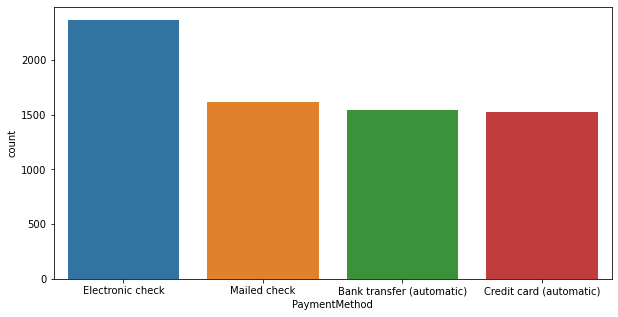

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(df['PaymentMethod'])

There are 4 categories under PaymentMethod columns

Majority of the customers use Electronic check as PaymentMethod followed by Mailed check and Bank transfer (automatic) payment methods and least are through Credit card (automatic)

# Analyzing the relationship between independent variable and dependent Variable

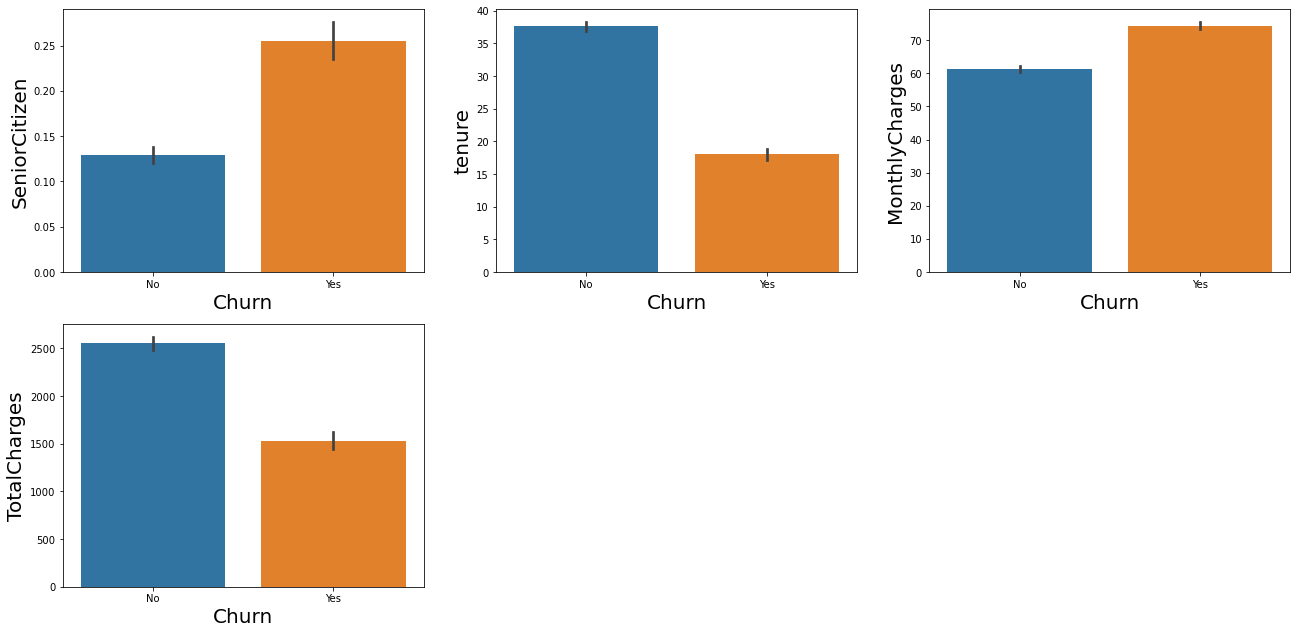

In [53]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
y_plot = df['Churn']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

from above plots, we can observe the following details

1.SeniorCitizens Customers has higher Churn rate (attrition rate)

2.Less tenure customers has higher Churn rate (attrition rate)

3.Customers with Monthly Charges greater than 60 has higher Churn rate (attrition rate)

4.Lower Total Charges paid customers has higher Churn rate (attrition rate)

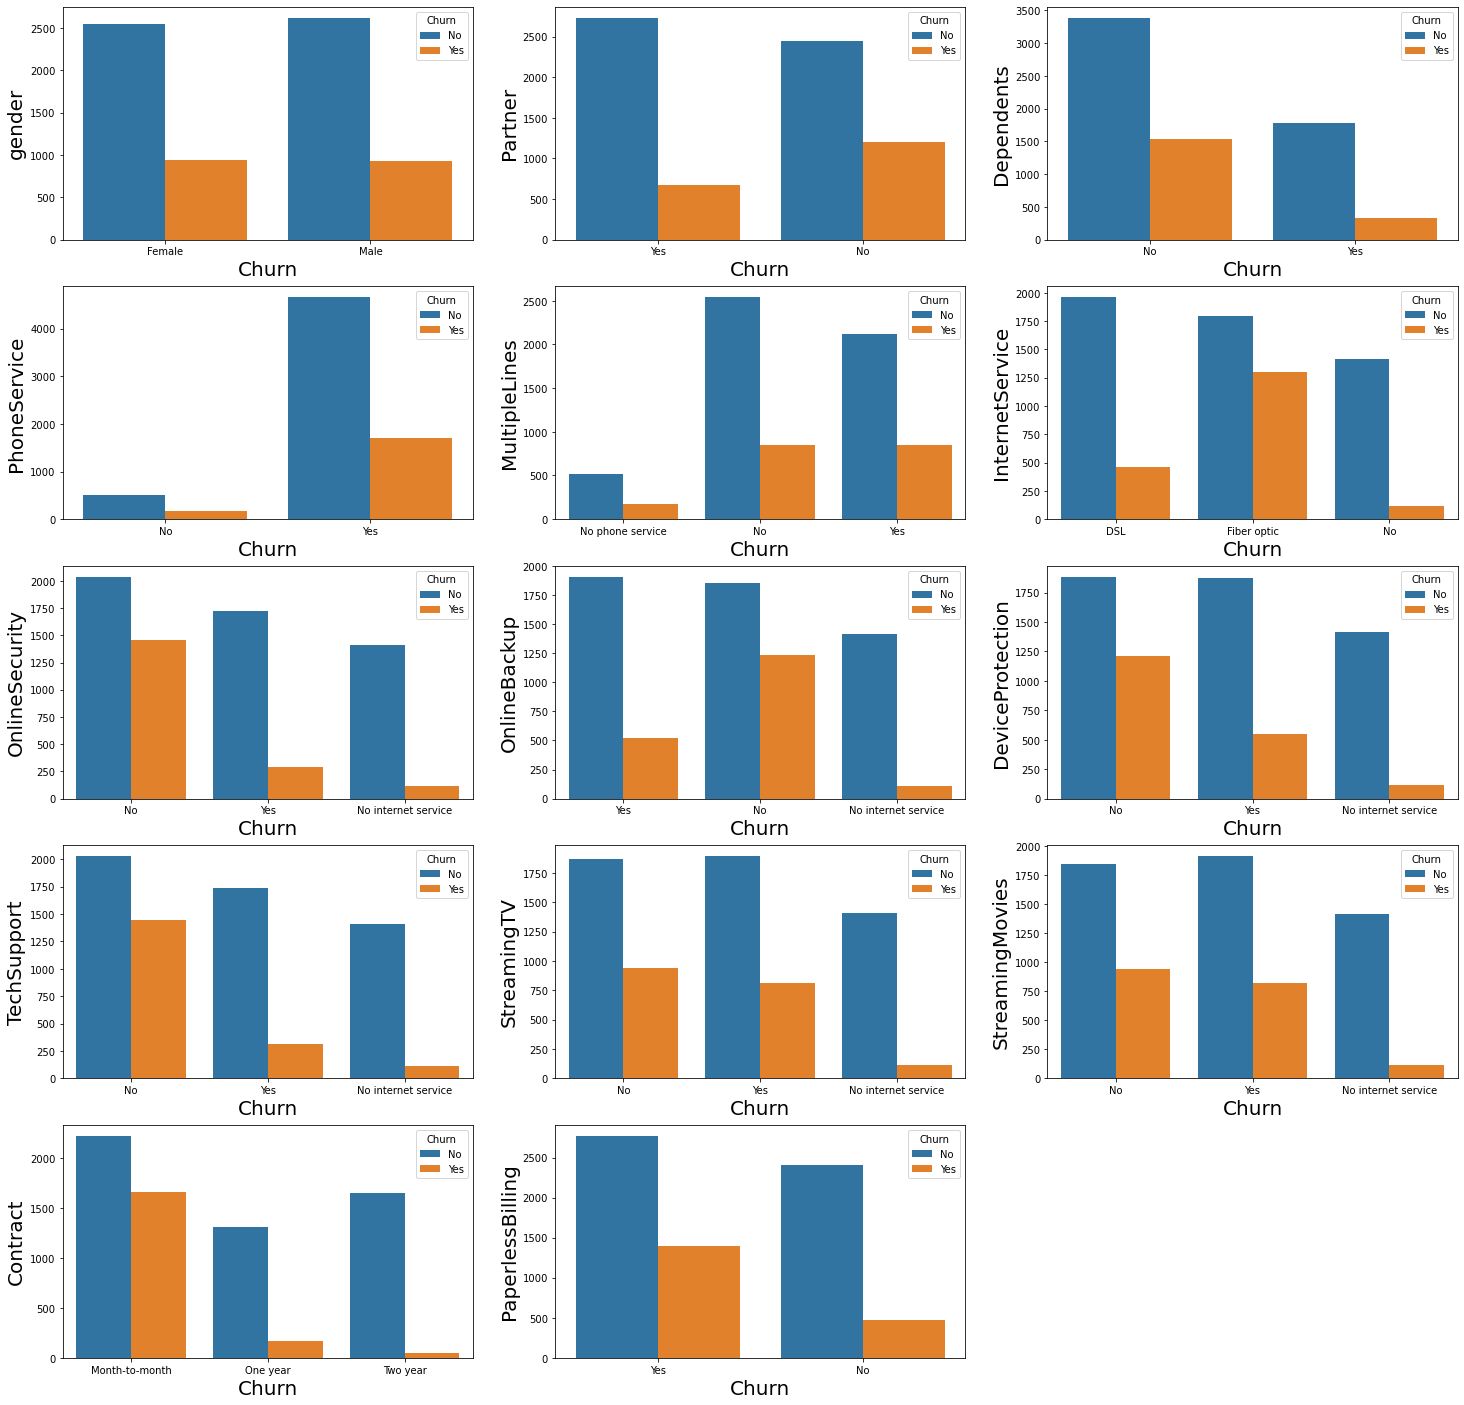

In [54]:
plt.figure(figsize=(25,30),facecolor='white')
plot_number=1
x_plot = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
             'Contract', 'PaperlessBilling']]
y_plot = df['Churn']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        plt.subplot(6,3,plot_number)
        sns.countplot(x_plot[i], hue=y_plot)
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

From the above graph, we can observe following details,

PaperlessBilling - Customers who use paperless billing has higher Churn rate

gender - There is no much difference in the Churn rate with respect to Gender.

Partner - Customers who doesnt have partner are having higher Churn rate

Dependents - Customers who doesnt have any dependents are having higher Churn rate

PhoneService - Customers who use Phone services has higher Churn rate

MultipleLines - Churn rate is almost same for the customers with and without Multiple Lines

InternetService - Customers who use Fiber optics based internet service has higher Churn rate

OnlineSecurity - Customers who doesnt have/ use online security service are having higher Churn rate

OnlineBackup - Customers who doesnt have/ use online backup service are having higher Churn rate

DeviceProtection - Customers who doesnt have/ use device protection service are having higher Churn rate

TechSupport - Customers who doesnt have/ use Tech Support service are having higher Churn rate

StreamingTV - Customers who doesnt have/ use streaming TV service are having higher Churn rate

StreamingMovies - Customers who doesnt have/ use streaming movies service are having higher Churn rate

Contract - Customers who are under the contract of Month to month are having higher Churn rate.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

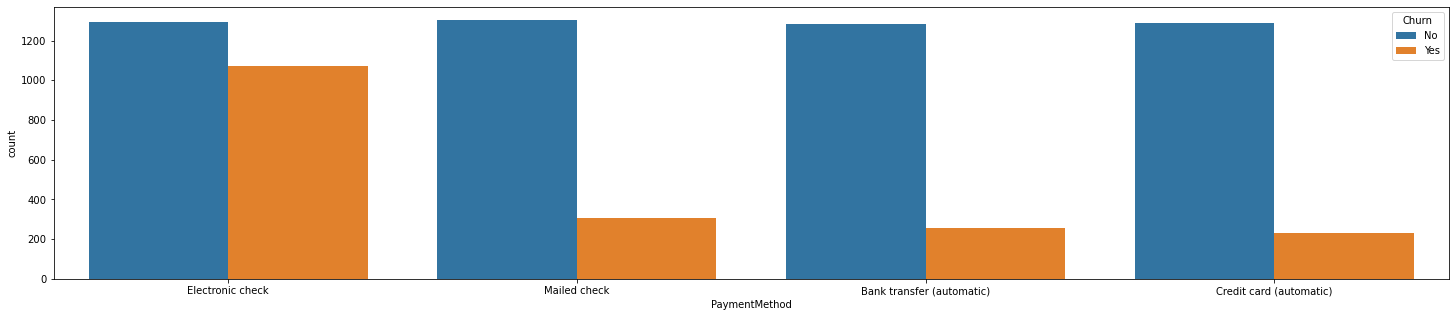

In [55]:
plt.figure(figsize=(25,5),facecolor='white')
sns.countplot(df['PaymentMethod'], hue=df['Churn'])

Customers who does payment through Electronic check has higher attrition rate / Churn rate and rest 3 payment modes customers have almost same Churn rate

# Encoding the Categorical Data in Dataset using LabelEncoder

In [56]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


We can observe that all the columns are now having numerical Data Type

In [58]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


Analyzing the changes in dataset after encoding. All values are numericals now.

# Checking Correlation between each columns data

In [60]:
corr_mat=df.corr()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


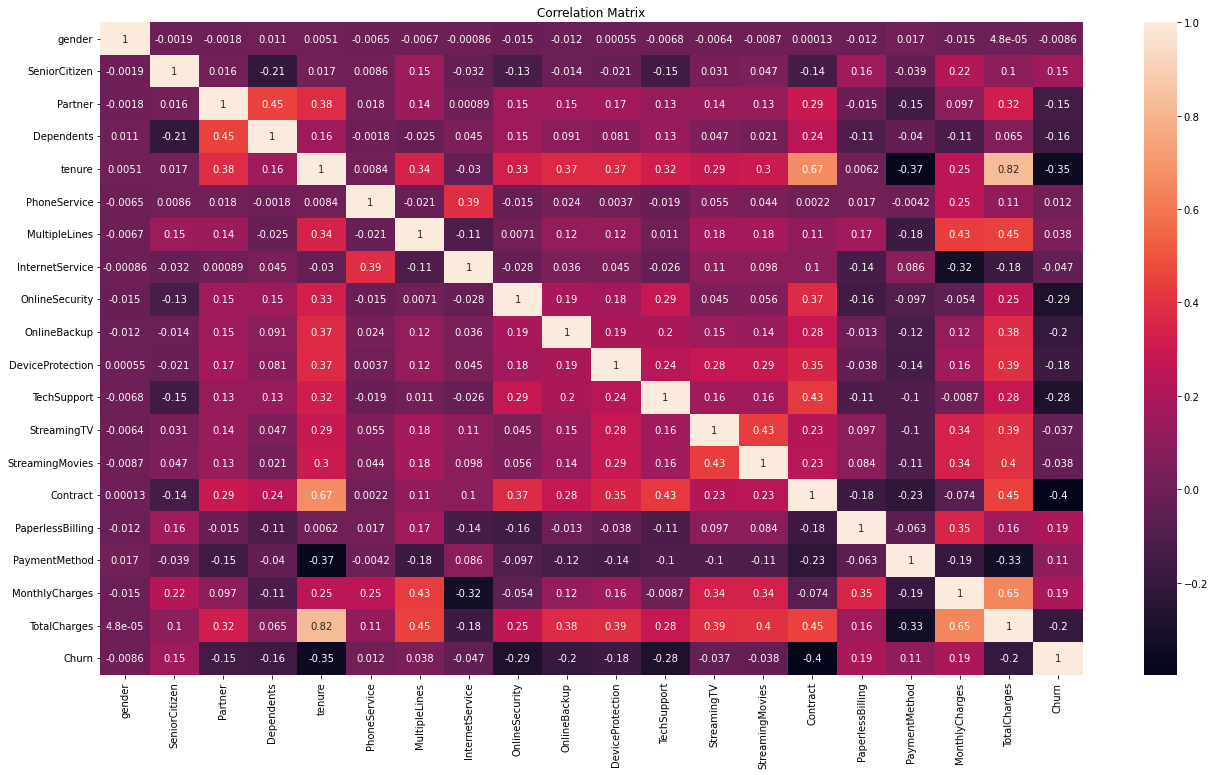

In [61]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

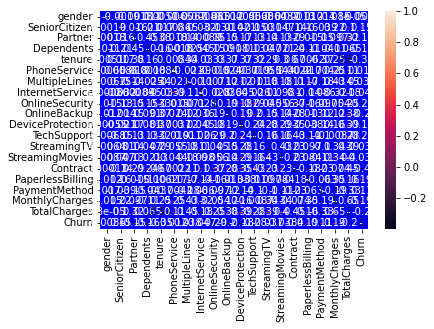

In [62]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='b')

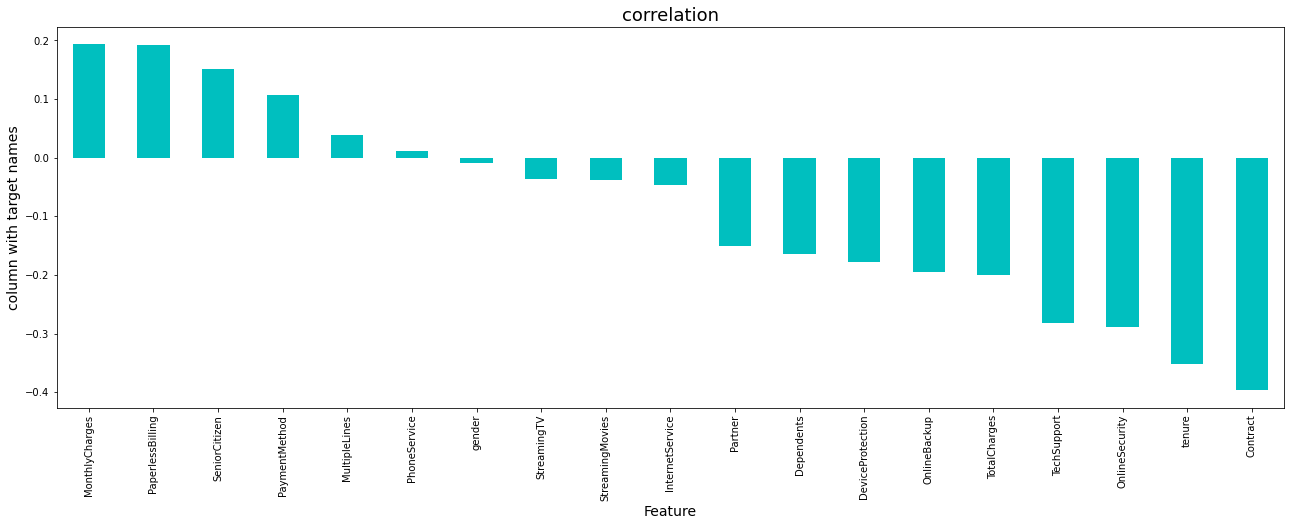

In [63]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [64]:
corr_mat["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.

MonthlyCharges, paperlessBilling, SeniorCitizen are the positively correlated Column with Churn Column data

Contract, tenure, OnlineSecurity, TechSupport are the negatively correlated Column with Churn Column data.

gender and PhoneService are the least correlated column data. We can drop these columns if required at later stages for better Model Prediction

# Checking for Outliers through boxplots and analyzing each column Outliers

In [65]:
x = df.drop(columns=['Churn'])
y = df['Churn']
x_outlier=x.copy()
x_outlier

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


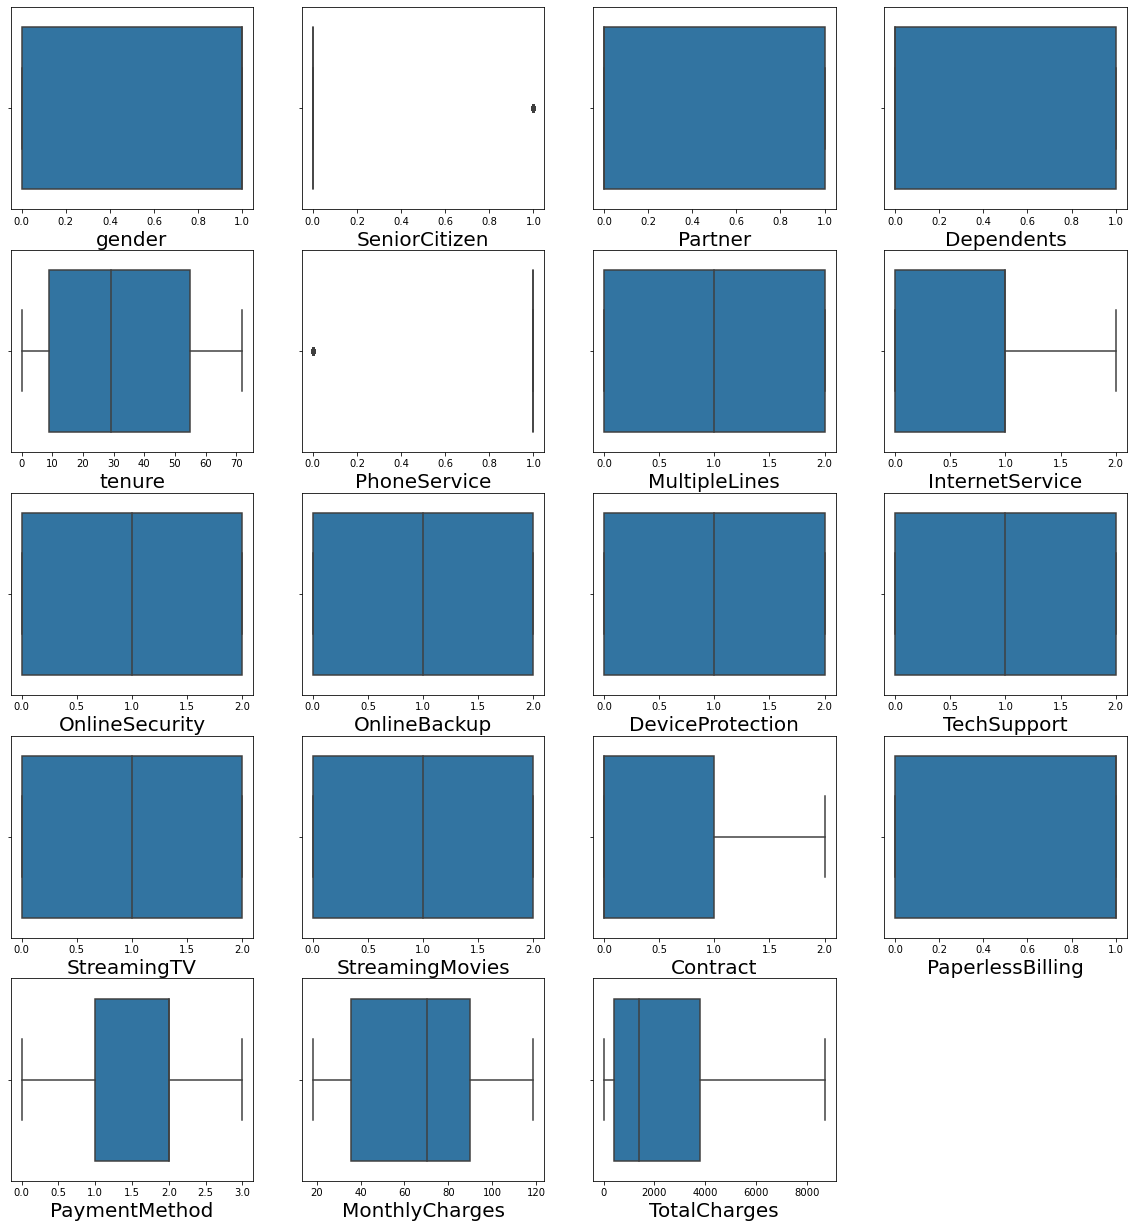

In [66]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

From above plots, we can observe that there are no outliers in the continous data columns

# Skewness Analysis and Skewness Correction

# 1. Using CBRT Technique

In [67]:
df_cbrt = df.copy()
df_cbrt

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


Copying the dataset to new name for CBRT Technique

In [68]:
x = df_cbrt.drop(columns=['Churn'])
y = df_cbrt['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [69]:
x[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Upon review, found TotalCharges columns has skewness outside the allowed range of -0.5 to +0.5

In [70]:
x1=x[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [71]:
for index in x1.skew().index:
    if x1.skew().loc[index] >0.50:
        x1[index]=np.cbrt( x1[index])
x1.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

Upon reviewing above set after skewness correction from CBRT Technique, found below observations,

TotalCharges Columns Skewness is reduced and within -0.50 to +0.50 range

# Analyzing the distribution plots after skewness correction

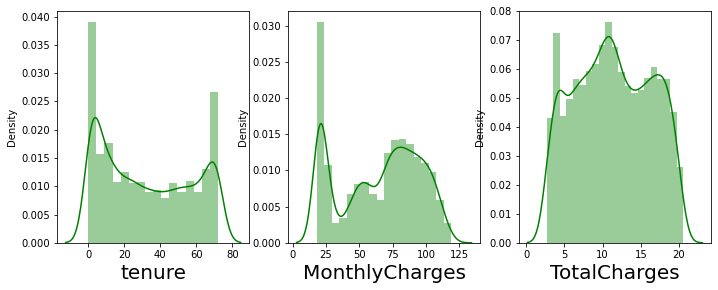

In [72]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x1:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x1[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

# Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

In [73]:
drop_index = df.index.difference(x1.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(7043, 20)

# Feature and Target Selection

In [74]:
x = df.drop(columns=['Churn'])
y = df['Churn']
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Applying Standard Scaler in order to check the Multicollinearity

In [75]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99497138],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17387565],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.96039939],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85518222],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87277729],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01391739]])

# Obtaining Multicollinearity using Variance Inflation Factor

In [76]:
vif = pd.DataFrame()
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,gender,1.001938
1,SeniorCitizen,1.149759
2,Partner,1.461052
3,Dependents,1.382351
4,tenure,7.213411
5,PhoneService,1.622493
6,MultipleLines,1.394323
7,InternetService,1.826632
8,OnlineSecurity,1.268868
9,OnlineBackup,1.218713


From above set, we can observe that TotalCharges column data has high multicollinear followed by tenure

# Principle Component Analysis

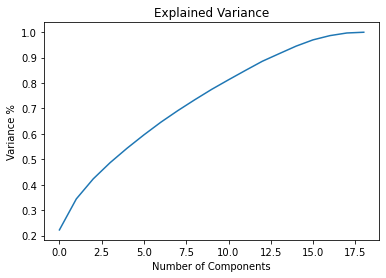

In [77]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 17 Principle components are contributing. So we can retain 17 components out of 19 components and build the model

In [78]:
pca_new = PCA(n_components=17)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(17))
x_principle

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-2.375273,0.162112,2.939462,-0.383460,0.640255,-1.027580,1.142122,1.095186,-2.108969,-0.497633,-0.165561,-0.242697,-0.124294,-0.081093,0.127908,-1.453334,0.280664
1,-1.177145,-1.058310,0.781588,1.217020,-0.473442,1.100787,-0.808529,0.451343,1.995584,-0.157628,1.270601,-1.087812,-1.138303,-1.028496,-0.389884,0.398540,0.228078
2,-2.478350,-0.006004,0.949414,0.508172,-0.855107,0.789191,-1.753653,1.907415,-0.579958,0.580880,0.090364,0.067209,-1.443664,-0.023805,0.042083,-0.045566,0.708156
3,0.054753,-1.648241,3.420421,2.343979,-0.005643,1.121092,0.648724,-1.534282,0.753600,-0.008268,0.260138,-0.650979,-0.055502,0.974076,-0.035078,-0.151320,-0.799194
4,-3.117902,0.874633,-0.126336,-0.152497,-0.548882,-1.084803,-0.743145,-0.453735,-0.218740,0.265390,-0.061556,-0.489396,0.018851,-0.679809,-0.096391,0.113849,-0.151767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.741886,-0.220296,0.162081,-0.512277,2.518914,0.484370,-1.450147,0.664390,1.822141,0.511125,-0.690873,-0.690481,-0.053845,1.155826,0.206523,0.076777,1.019141
7039,3.665723,1.197050,-0.625185,-1.590085,0.670376,-1.041176,0.105499,0.127608,-1.110431,-1.014047,0.799832,-0.593818,-0.299408,-0.499530,-0.026554,0.602861,-0.587247
7040,-1.989197,-0.968514,3.460049,-1.455132,1.238350,-1.243241,0.550921,0.356010,0.165349,0.184686,-1.115551,-0.401056,-1.562244,0.588076,0.087249,-0.168138,-0.505194
7041,-2.281456,2.039799,0.067969,-1.700275,-0.566460,1.252325,1.055514,1.157244,1.161768,0.307549,-0.921897,-0.647969,0.725053,0.119199,0.016977,-0.609762,0.576775


# Selecting KBest Features

Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [79]:
best_features = SelectKBest(score_func = f_classif, k = 17)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(19,'Scores'))

            Features       Scores
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   291.629021
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


Upon reviewing Best Features Scores, found gender has the least score and TotalCharges has multicollinearity. gender columns has the less correlationship with target variable. So dropping these 2 columns for better accuracy

In [80]:
x_best = x.drop(columns=['gender', 'TotalCharges']).copy()
x_best

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


# Model Building: Classification Problem

# Finding the Best Random State

In [85]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8182234432234432 on random_state: 24


In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [87]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

In [88]:
#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

In [89]:
#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

In [90]:
#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

In [91]:
#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

# Random Forest Classifier

In [92]:
confusion_matrix_rfc

array([[1483,  151],
       [ 279,  271]], dtype=int64)

In [93]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1634
           1       0.64      0.49      0.56       550

    accuracy                           0.80      2184
   macro avg       0.74      0.70      0.72      2184
weighted avg       0.79      0.80      0.79      2184



In [94]:
print(cvs_rfc)

0.7917091425253243


In [95]:
print(roc_rfc)

0.7001580060086792


# Logistic Regression Model

In [96]:
confusion_matrix_lrc

array([[1470,  164],
       [ 228,  322]], dtype=int64)

In [97]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1634
           1       0.66      0.59      0.62       550

    accuracy                           0.82      2184
   macro avg       0.76      0.74      0.75      2184
weighted avg       0.81      0.82      0.82      2184



In [98]:
print(cvs_lrc)

0.8051966054261566


In [99]:
print(roc_lrc)

0.7425436741960609


# Decision Tree Classifier Model

In [100]:
confusion_matrix_dtc

array([[1320,  314],
       [ 252,  298]], dtype=int64)

In [101]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1634
           1       0.49      0.54      0.51       550

    accuracy                           0.74      2184
   macro avg       0.66      0.67      0.67      2184
weighted avg       0.75      0.74      0.75      2184



In [102]:
print(cvs_dtc)

0.7245481563326666


In [103]:
print(roc_dtc)

0.6748258595749417


# SVC Model

In [104]:
confusion_matrix_sv

array([[1634,    0],
       [ 550,    0]], dtype=int64)

In [105]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1634
           1       0.00      0.00      0.00       550

    accuracy                           0.75      2184
   macro avg       0.37      0.50      0.43      2184
weighted avg       0.56      0.75      0.64      2184



In [106]:
print(cvs_sv)

0.7346301575908123


In [107]:
print(roc_sv)

0.5


# K Nearest Neighbors Classifier Model

In [108]:
confusion_matrix_knn

array([[1436,  198],
       [ 303,  247]], dtype=int64)

In [109]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1634
           1       0.56      0.45      0.50       550

    accuracy                           0.77      2184
   macro avg       0.69      0.66      0.67      2184
weighted avg       0.76      0.77      0.76      2184



In [110]:
print(cvs_knn)

0.7627432616620428


In [111]:
print(roc_knn)

0.663957939245577


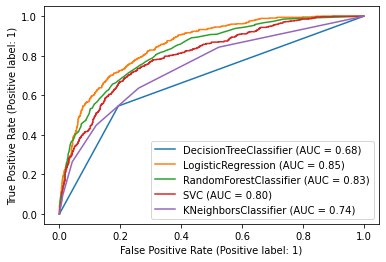

In [112]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, KNN Classifier Model ranks with least difference followed by SVC, DTC and Random Forest Classifier. However, Random Forest Classifier has best AUC score compared to SVC, DTC and KNN method and also accuracy is high so choosing Random Forest Classifier as Best Model and proceeding with Hyper Paramater tuning

# Hyper Parameter Tuning Using Grid Search

# Defining the Parameters list for Random Forest Classifier

In [113]:
parameters = {'ccp_alpha': np.array([0.5,0.05,0.005,0.0005,1,0.1,0.01]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,150],
             'max_features': ["auto","sqrt"]}

In [114]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [115]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 150],
                         'max_features': ['auto', 'sqrt']},
             verbose=2)

In [116]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0005,
 'criterion': 'gini',
 'max_depth': 150,
 'max_features': 'auto'}

Obtaining Best Parameters details for Best Model after training the parameters list given

# Training the Best Model with the Best Model Parameters

In [117]:
Best_model = RandomForestClassifier(ccp_alpha = 0.0005, bootstrap = True, criterion = 'entropy', max_depth = 150, max_features = 'sqrt')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

81.31868131868131


# Saving the Best Model

In [119]:
joblib.dump(Best_model,"Customer_Churn_Analysis_Project.pkl")

['Customer_Churn_Analysis_Project.pkl']

# Loading the Best Model

In [120]:
joblib.dump(Best_model,"Customer_Churn_Analysis_Project.pkl")

['Customer_Churn_Analysis_Project.pkl']

# Comparing Actual Value and Predicted Value

In [121]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
2179,1,0
2180,0,0
2181,1,0
2182,0,0
